In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e20/sample_submission.csv
/kaggle/input/playground-series-s3e20/train.csv
/kaggle/input/playground-series-s3e20/test.csv


In [2]:
import matplotlib.pyplot as plt 
import branca.colormap as cm 
import seaborn as sns 
import folium 

# SK-learn 
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline 
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# models 
from sklearn.ensemble import RandomForestRegressor

from haversine import haversine

rs = 0

In [3]:
train = pd.read_csv("/kaggle/input/playground-series-s3e20/train.csv", index_col = "ID_LAT_LON_YEAR_WEEK")

train.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [4]:
test = pd.read_csv("/kaggle/input/playground-series-s3e20/test.csv", index_col = "ID_LAT_LON_YEAR_WEEK")

test.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,15.600607,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,39.889060,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
ID_-0.510_29.290_2022_03,-0.51,29.29,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,58.862543,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
ID_-0.510_29.290_2022_04,-0.51,29.29,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,15.646016,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 7   SulphurDioxide_cloud_fraction                             64414 no

In [6]:
{col.split('_')[0] for col in train.columns}

{'CarbonMonoxide',
 'Cloud',
 'Formaldehyde',
 'NitrogenDioxide',
 'Ozone',
 'SulphurDioxide',
 'UvAerosolIndex',
 'UvAerosolLayerHeight',
 'emission',
 'latitude',
 'longitude',
 'week',
 'year'}

In [7]:
missing = train.isnull().sum()
missing[missing > 0].sort_values(ascending = False).head(20)

UvAerosolLayerHeight_aerosol_pressure                      78584
UvAerosolLayerHeight_solar_zenith_angle                    78584
UvAerosolLayerHeight_aerosol_height                        78584
UvAerosolLayerHeight_aerosol_optical_depth                 78584
UvAerosolLayerHeight_sensor_zenith_angle                   78584
UvAerosolLayerHeight_sensor_azimuth_angle                  78584
UvAerosolLayerHeight_solar_azimuth_angle                   78584
NitrogenDioxide_NO2_slant_column_number_density            18320
NitrogenDioxide_tropopause_pressure                        18320
NitrogenDioxide_tropospheric_NO2_column_number_density     18320
NitrogenDioxide_absorbing_aerosol_index                    18320
NitrogenDioxide_cloud_fraction                             18320
NitrogenDioxide_sensor_altitude                            18320
NitrogenDioxide_sensor_azimuth_angle                       18320
NitrogenDioxide_sensor_zenith_angle                        18320
NitrogenDioxide_solar_azi

In [8]:
train.isnull().groupby(train['year']).sum().sum(axis = 1)

year
2019    309254
2020    333338
2021    347499
dtype: int64

In [9]:
train[['year', 'emission']].describe()

,year,emission
count,79023.000000,79023.000000
mean,2020.000000,81.940552
std,0.816502,144.299648
min,2019.000000,0.000000
25%,2019.000000,9.797995
50%,2020.000000,45.593445
75%,2021.000000,109.549595
max,2021.000000,3167.768000


In [10]:
train_plot = train.copy(deep = True)
train_plot['date'] = pd.to_datetime(train_plot['year'].astype(str) + '-' + train_plot['week_no'].astype(str) + '-1', format = "%Y-%W-%w")

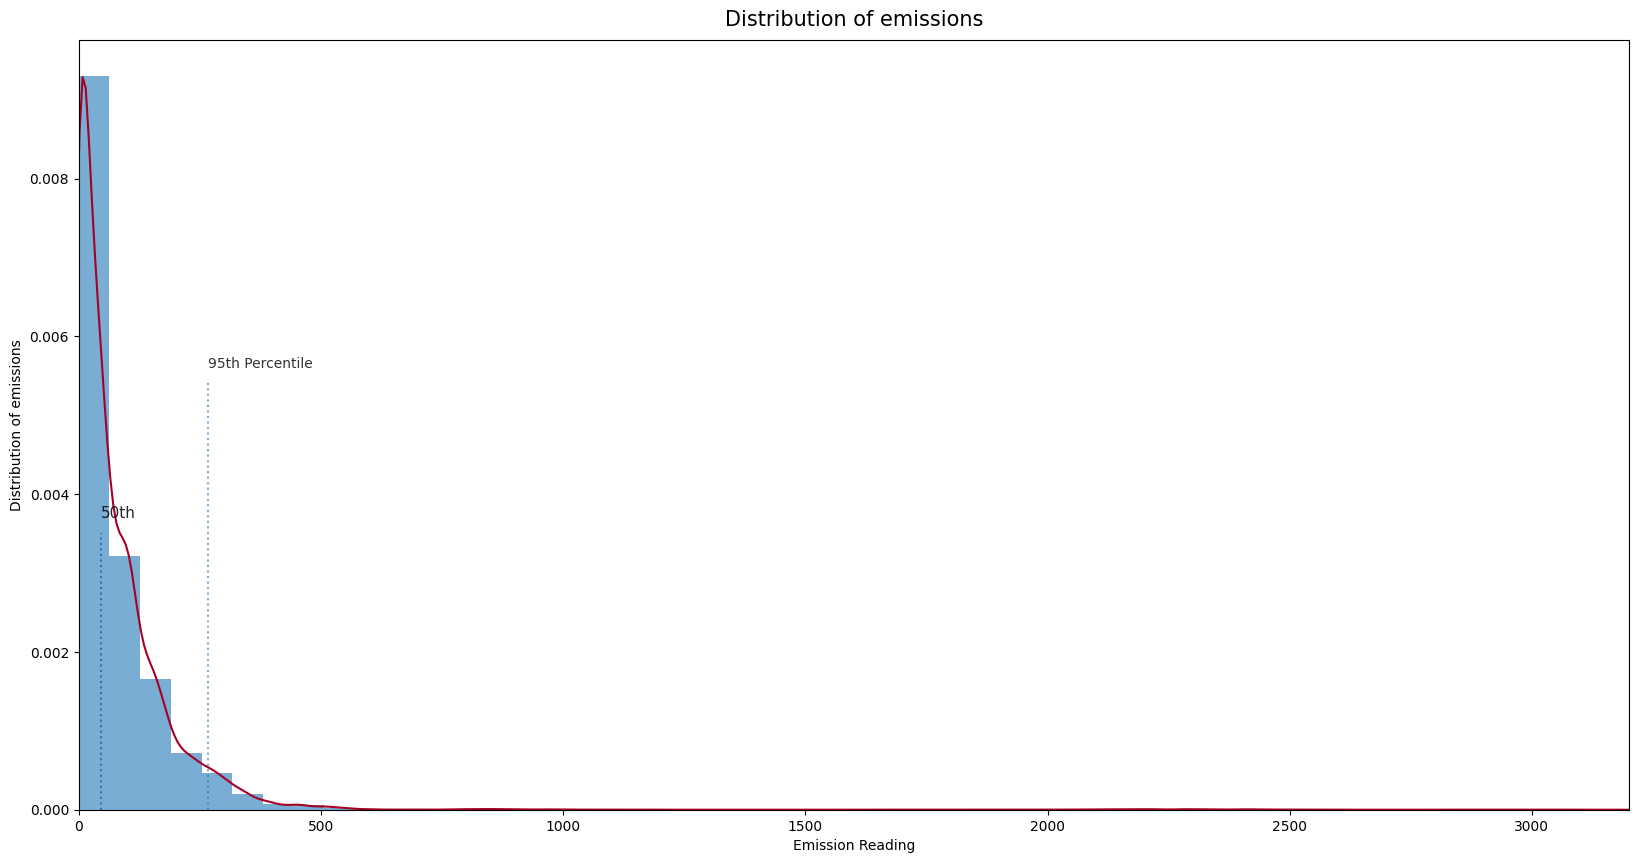

In [11]:
train['emission'].plot(kind = "hist", density = True, alpha = 0.65, bins = 50,
                      colormap = 'tab20c', figsize = (20,10))
train['emission'].plot(kind = 'kde',
                      colormap= 'RdYlBu', figsize = (20,10))

# Quantile lines 
quant_50, quant_95 = train['emission'].quantile(0.5), train['emission'].quantile(0.95)

quants = [[quant_50, 1, 0.36], [quant_95, 0.6, 0.56]]

for i in quants:
    plt.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
    
# X 
plt.xlabel('Emission Reading')
plt.xlim((0, 3200))

# Y 
plt.ylabel("Distribution of emissions")

plt.text(quant_50, 0.0037, "50th", size = 11, alpha = .85)
plt.text(quant_95, 0.0056, "95th Percentile", size = 10, alpha = .8)

plt.title("Distribution of emissions", size = 15, pad = 10)
plt.show()

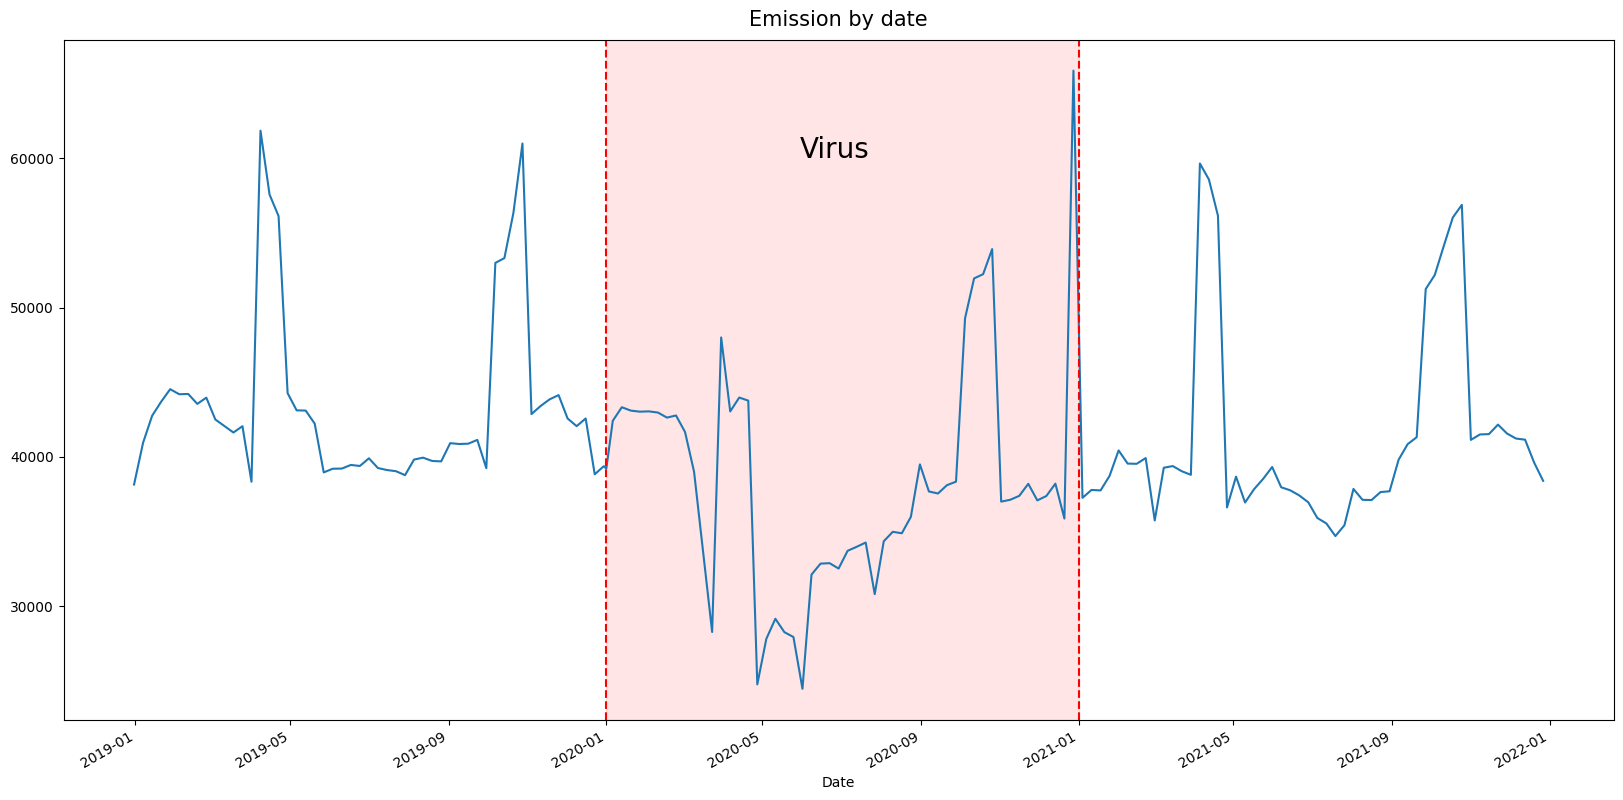

In [12]:
train_plot.groupby(['date'])['emission'].sum().plot(
kind = 'line',
figsize = (20,10), xlabel = 'Date')

plt.axvspan(pd.Timestamp('2020-01-01'), 
            pd.Timestamp('2021-01-01'),
           color = 'red',
           alpha = 0.1)
plt.axvline(pd.Timestamp('2020-01-01'),
           linestyle = '--', color = 'red')
plt.axvline(pd.Timestamp('2021-01-01'),
           linestyle = '--', color = 'red')

plt.text(pd.Timestamp('2020-05-30'), 60000, "Virus", size = 20)

plt.title("Emission by date", size = 15, pad = 10)
plt.show()

Removing 2020 from the graph becuase of Covid the trend is different and may lead to overfitting in the data

In [13]:
mask = train_plot['date'].dt.year != 2020
train_plot_no_2020 = train_plot[mask]

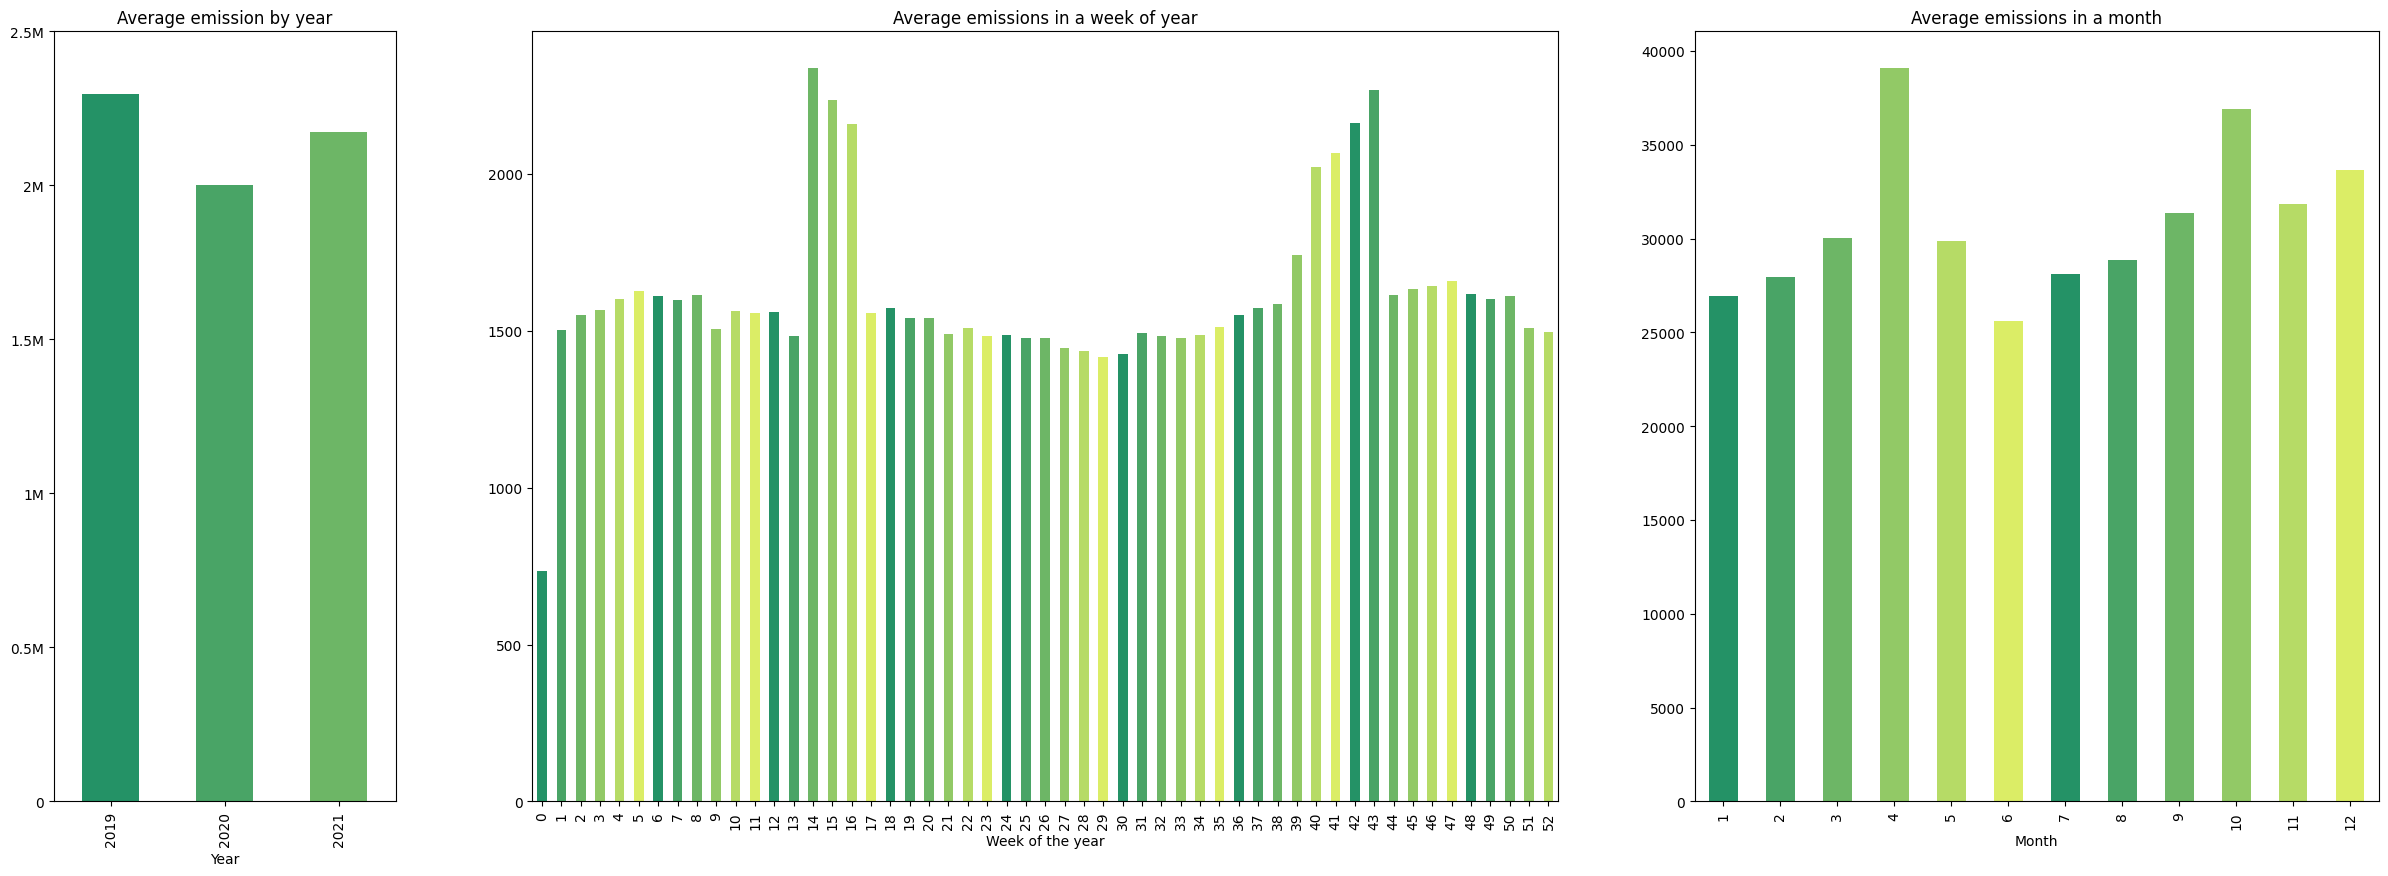

In [14]:
fig, axs = plt.subplots(1,3, width_ratios = [1,3,2], figsize = (30,10))

train_plot.groupby('year')['emission'].sum().plot(kind = 'bar',
                                                 title = 'Average emission by year',
                                                 xlabel = 'Year',
                                                 color = sns.color_palette('summer'), ax = axs[0])
avg_week = train_plot_no_2020.groupby('week_no')['emission'].sum() / 52
avg_week.plot(kind = 'bar', title = "Average emissions in a week of year",
             xlabel = "Week of the year", color = sns.color_palette('summer'), ax = axs[1])

avg_month = train_plot_no_2020.groupby(train_plot['date'].dt.month)['emission'].sum() / 12
avg_month.plot(kind = 'bar', title = "Average emissions in a month",
              xlabel = 'Month', color = sns.color_palette('summer'), ax = axs[2])

axs[0].set_xticklabels([2019, 2020, 2021])
axs[0].set_yticks(list(range(0, 3_000_000, 500_000)),
                 ['0', '0.5M', '1M', '1.5M', '2M', '2.5M'])

plt.show()

In [15]:
train.drop_duplicates(subset = ['latitude', 'longitude']).shape[0]

497

497 unique locations measured

In [16]:
zero_emissions = train.groupby(['latitude', 'longitude'])['emission'].mean().to_frame()
zero_emissions = zero_emissions[zero_emissions['emission'] == 0]
zero_emissions

,,emission
latitude,longitude,
-2.898,29.002,0.0
-2.859,29.041,0.0
-2.841,29.159,0.0
-2.817,29.283,0.0
-2.496,28.504,0.0
-1.974,28.526,0.0
-1.839,28.761,0.0
-1.833,28.467,0.0
-1.730,28.470,0.0


15 places reported 0 emissions 

Grouping by location (`latitude` and `longitude`) to compute sum of `emission`

In [17]:
loc = train.groupby(['latitude','longitude'])['emission'].sum().reset_index()

# Create a linear colormap that maps emission values to colors 
colormap = cm.LinearColormap(['green', 'red'], vmin=0, vmax=75_000)

# create a map centered at the mean latitude and longitude of points 
m = folium.Map(location = [loc['latitude'].mean(),
                          loc['longitude'].mean()])

# Add a circle marker to the map for each point in grouped dataframe 

for _, row in loc.iterrows():
    rows_emission = row['emission']
    color = 'blue' if rows_emission == 0 \
    else colormap(rows_emission) \
    if rows_emission < 10**5 else 'black'
    folium.Circle(location = [row['latitude'], row['longitude']],
                 radius = np.sqrt(row['emission'])*15,
                 color = color,
                 fill = True,
                 fill_color = color).add_to(m)
    
# Fit the map to the bounds 
m.fit_bounds(m.get_bounds())

m

2 Cities that registered the highest emissions 

<Axes: title={'center': 'Total emissions by location'}>

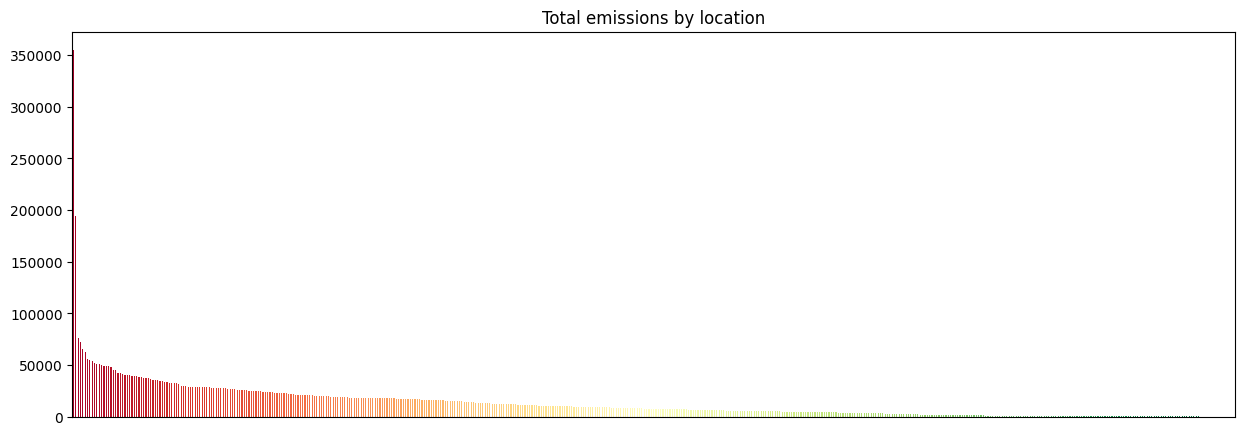

In [18]:
loc['emission'].sort_values(ascending = False).plot(kind = 'bar',
                                                   title = 'Total emissions by location',
                                                   xticks = [], figsize = (15,5),
                                                   color = sns.color_palette('RdYlGn', n_colors = 497))

In [19]:
np.array_equal(test[['latitude', 'longitude']].drop_duplicates(subset=['latitude','longitude']).values,
              train[['latitude', 'longitude']].drop_duplicates(subset=['latitude', 'longitude']).values)

True

Train and Test set have the same locations

### Feature Engineering 
***

In [20]:
train['date'] = pd.to_datetime(train['year'].astype(str) \
                              + '-' + train['week_no'].astype(str) + '-1',
                              format = "%Y-%W-%w")

Dropping UV Aerosole feature group 
features has **99% missing values** also there's data drift between the training and test data

In [21]:
train.drop(columns=[
    'UvAerosolLayerHeight_aerosol_pressure',
    'UvAerosolLayerHeight_solar_zenith_angle',
    'UvAerosolLayerHeight_aerosol_height', 
    'UvAerosolLayerHeight_aerosol_optical_depth'
    , 'UvAerosolLayerHeight_sensor_zenith_angle',
    'UvAerosolLayerHeight_sensor_azimuth_angle',
    'UvAerosolLayerHeight_solar_azimuth_angle'
], inplace = True)

Fixing for 2020 

In [22]:
avg_emission_not_2020 = train[train['year'].isin((2019,2021))].groupby('week_no')['emission'].mean()

avg_emission_2020 = train[train['year'] == 2020].groupby('week_no')['emission'].mean()

ratios_for_weeks = avg_emission_not_2020/avg_emission_2020

train.loc[train['year'] == 2020, 'emission'] *= train['week_no'].map(ratios_for_weeks)

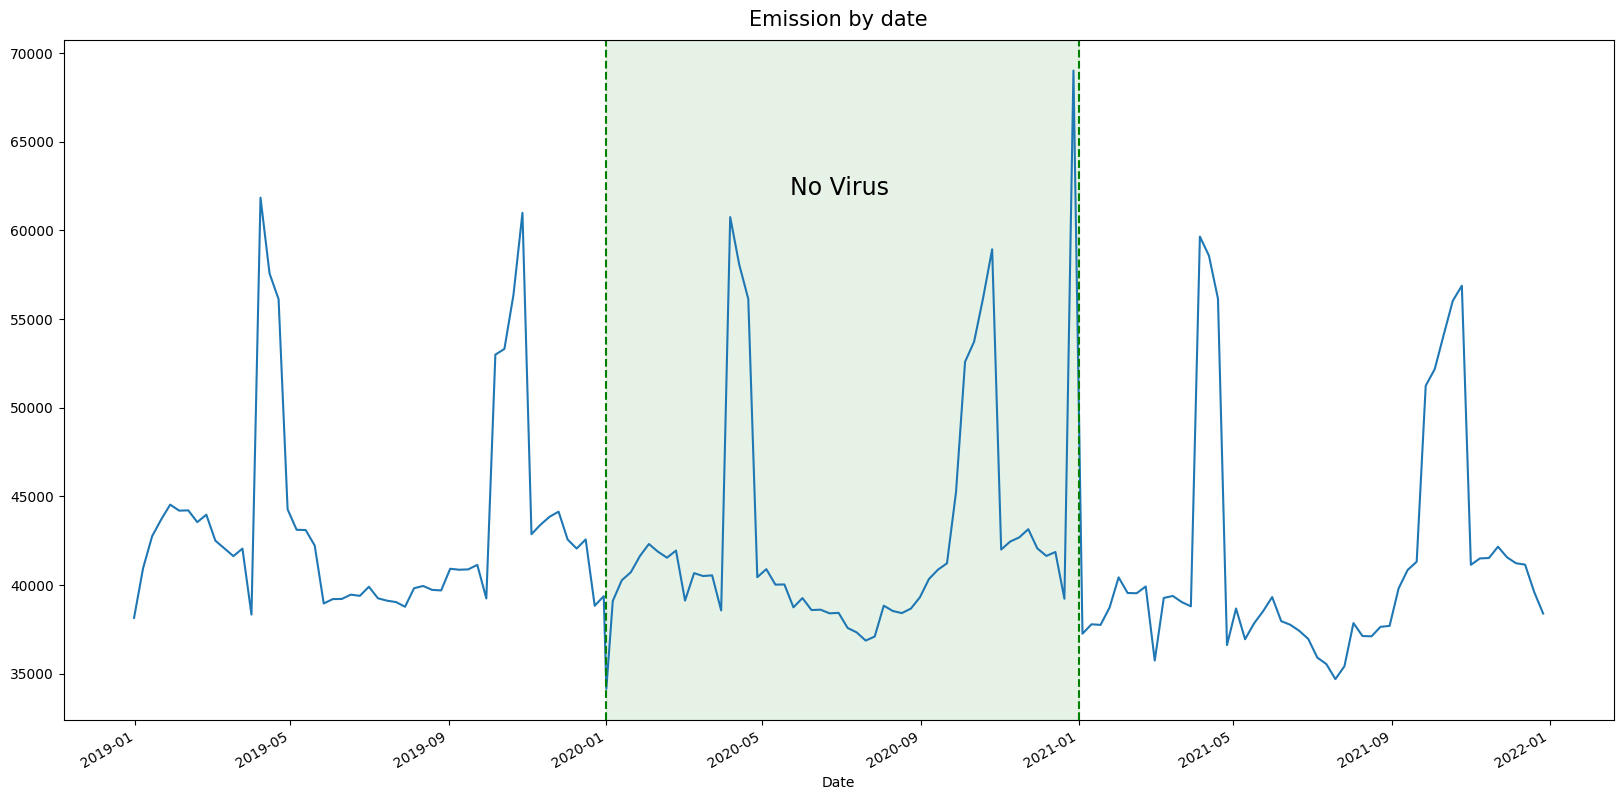

In [23]:
train.groupby(['date'])['emission'].sum().plot(
kind = 'line',
figsize = (20,10),
xlabel = 'Date')

plt.axvspan(pd.Timestamp('2020-01-01'),
           pd.Timestamp('2021-01-01'),
           color = 'green',
           alpha = 0.1)
plt.axvline(pd.Timestamp('2020-01-01'),
           linestyle = '--', color = 'green')
plt.axvline(pd.Timestamp('2021-01-01'),
           linestyle = '--', color = 'green')

plt.text(pd.Timestamp('2020-05-22'), 62000,
        "No Virus", size = 17)
plt.title("Emission by date", size = 15, pad = 10)
plt.show()

In [24]:
train.loc[(train['week_no'] == 52) & \
         (train['year'] == 2020), 'emission'] = np.power(train.loc[(train['week_no'] == 52) & \
                                                                  (train['year'] == 2020), 'emission'],
                                                        1/1.5)

- Long rainy season: March to May. 
- Short rainy season: September to November
- Long dry season: June to August
- Short dry season: December to February

Adding season features labels 1 to 4

In [27]:
train['season'] = train['date'].dt.month.apply(lambda x: 1 if 3 <= x <= 5 else 2\
                                              if 6 <= x <= 8 else 3 if 9 <= x <=11 else 4)

introduces over fitting so not used for training

In [29]:
train['holidays'] = (train['week_no'].isin([0,51,12,30]))

### Cyclic features

In [30]:
train['week_sin'] = np.sin(2*np.pi * train['week_no']/53)
train['week_cos'] = np.cos(2 * np.pi * train['week_no']/53)

In [34]:
train['rot_15_x'] = (np.cos(np.radians(15)) * train['longitude']) + (np.sin(np.radians(15)) * train['longitude'])
train['rot_15_y'] = (np.cos(np.radians(15) * train['latitude']) +\
                    (np.sin(np.radians(15)) * train['longitude']))

train['rot_30_x'] = (np.cos(np.radians(30)) * train['longitude']) + (np.sin(np.radians(30)) * train['latitude'])

train['rot_30_y'] = (np.cos(np.radians(30)) * train['latitude']) + (np.sin(np.radians(30)) * train['longitude'])

### Clustering


In [38]:
avg_emissions_for_locations = train.groupby(['latitude', 'longitude'], as_index = False)['emission'].mean()

cluster_num = 7 
kmeans = KMeans(cluster_num, n_init = 'auto',
               random_state = rs).fit(avg_emissions_for_locations)

centers = kmeans.cluster_centers_[:, :2]

clusters = kmeans.predict(avg_emissions_for_locations)

# For each location add cluster and its center coordinates
avg_emissions_for_locations['cluster'] = clusters
avg_emissions_for_locations[['latitude_cluster', 'longitude_cluster']] = centers[clusters]


# distance from the location to its cluster's center
highest_emission_location = avg_emissions_for_locations.loc[avg_emissions_for_locations['emission'].idxmax()]

avg_emissions_for_locations['distance_to_max_emission'] = avg_emissions_for_locations.apply(
lambda x: haversine(
    (x['latitude'], x['longitude']),
(highest_emission_location['latitude'],
highest_emission_location['longitude'])
), axis = 1)

# Each emission reading (row) from train will now have its cluster and distance to cluster center

train = train.merge(avg_emissions_for_locations[['latitude',
                                            'longitude','cluster','distance_to_max_emission']],
                   on = ['latitude', 'longitude']).set_index(train.index)

### Select features

some columns are only adding noise so better to handpick features

In [39]:
training_cols = ['latitude', 
                'longitude', 'year', 'week_sin', 'week_cos', 'holidays',
                'rot_15_x', 'rot_15_y', 'rot_30_x', 'rot_30_y', 'distance_to_max_emission']

## Preprocessing 
***

### Split data

In [40]:
X_train = train.drop(columns='emission')
y_train = train['emission']

### Pipeline

In [41]:
pipeline = make_pipeline(
SimpleImputer(strategy='mean'),

QuantileTransformer(output_distribution='normal', random_state = rs),
StandardScaler())

QuantileTransformer will change the distribution of each feature to match the normal distribution which is preferred by ML models and will help lessen the impact of outliers in the model

In [42]:
X_train = pipeline.fit_transform(X_train[training_cols])

In [43]:
X_train = pd.DataFrame(X_train,
                      columns = pipeline.get_feature_names_out(),
                      index = train.index)
X_train.head()

,latitude,longitude,year,week_sin,week_cos,holidays,rot_15_x,rot_15_y,rot_30_x,rot_30_y,distance_to_max_emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,
ID_-0.510_29.290_2019_00,4.955085,-0.620505,-1.224449,-0.008112,3.513784,3.500000,-0.621909,-0.109477,0.171275,1.017161,0.977665
ID_-0.510_29.290_2019_01,4.955085,-0.620505,-1.224449,0.060797,1.178293,-0.285714,-0.621909,-0.109477,0.171275,1.017161,0.977665
ID_-0.510_29.290_2019_02,4.955085,-0.620505,-1.224449,0.135017,1.014491,-0.285714,-0.621909,-0.109477,0.171275,1.017161,0.977665
ID_-0.510_29.290_2019_03,4.955085,-0.620505,-1.224449,0.211567,0.886901,-0.285714,-0.621909,-0.109477,0.171275,1.017161,0.977665
ID_-0.510_29.290_2019_04,4.955085,-0.620505,-1.224449,0.285314,0.756912,-0.285714,-0.621909,-0.109477,0.171275,1.017161,0.977665


## Modeling
***


### Model Training


In [45]:
model = RandomForestRegressor(min_samples_leaf = 6,
                             random_state = rs)

model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=6, random_state=0)

### Model Evaluation

In [47]:
gkf = GroupKFold(3)

scores = -cross_val_score(model, X_train, y_train,
                         scoring = 'neg_root_mean_squared_error',
                         cv = gkf.split(X_train, y_train, groups=train['year']))

print(f"Training RMSE: {mean_squared_error(y_train, model.predict(X_train),squared = False):.2f}")
print(f"Cross Validation RMSE: {scores.mean():.2f}")

Training RMSE: 14.80
Cross Validation RMSE: 22.21
